<a href="https://colab.research.google.com/github/PonugotiHaripriya/PonugotiHaripriya/blob/main/depressiometer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_excel("/content/dataset.xlsx")
print(df)

     age  sex  heart_rate  wake  REM  light_sleep  deep_sleep  final_HRV  \
0     25    1          70   120  125          150         200     148.75   
1     28    1         115    45   48           50          52      48.75   
2     30    1          72   100  110          128         150     122.00   
3     27    1          75   110  115          120         152     124.25   
4     45    1         105    40   42           45          49      44.00   
..   ...  ...         ...   ...  ...          ...         ...        ...   
305   49    1          93   120  125          130         135     127.50   
306   52    0          94    60   62           64          66      63.00   
307   36    1          95    80   82           84          90      84.00   
308   52    0          96    90   94           96         100      95.00   
309   36    1          97   120  125          130         135     127.50   

     depressed_not_depressed  
0                          0  
1                        

In [ ]:
df.columns

Index(['age', 'sex', 'heart_rate', 'wake', 'REM', 'light_sleep', 'deep_sleep',
       'final_HRV', 'depressed_not_depressed'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      310 non-null    int64  
 1   sex                      310 non-null    int64  
 2   heart_rate               310 non-null    int64  
 3   wake                     310 non-null    int64  
 4   REM                      310 non-null    int64  
 5   light_sleep              310 non-null    int64  
 6   deep_sleep               310 non-null    int64  
 7   final_HRV                310 non-null    float64
 8   depressed_not_depressed  310 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 21.9 KB


In [ ]:
df.describe()

,age,sex,heart_rate,wake,REM,light_sleep,deep_sleep,final_HRV,depressed_not_depressed
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,38.067742,0.506452,99.554839,60.696774,64.161290,67.000000,71.119355,65.744355,0.541935
std,16.152748,0.500767,22.941502,30.718868,31.092093,31.723318,33.141190,31.558201,0.499044
min,15.000000,0.000000,56.000000,23.000000,25.000000,28.000000,36.000000,29.250000,0.000000
25%,28.000000,0.000000,80.000000,35.000000,40.000000,43.000000,46.000000,41.500000,0.000000
50%,34.000000,1.000000,106.000000,44.000000,46.000000,47.500000,52.000000,46.875000,1.000000
75%,45.000000,1.000000,120.000000,80.000000,82.000000,84.000000,90.000000,84.000000,1.000000
max,94.000000,1.000000,129.000000,160.000000,165.000000,170.000000,200.000000,167.500000,1.000000


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
305,False
306,False
307,False
308,False


In [ ]:
df.isnull()


,age,sex,heart_rate,wake,REM,light_sleep,deep_sleep,final_HRV,depressed_not_depressed
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
305,False,False,False,False,False,False,False,False,False
306,False,False,False,False,False,False,False,False,False
307,False,False,False,False,False,False,False,False,False
308,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum()

,0
age,0
sex,0
heart_rate,0
wake,0
REM,0
light_sleep,0
deep_sleep,0
final_HRV,0
depressed_not_depressed,0


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'heart_rate'}>],
       [<Axes: title={'center': 'wake'}>,
        <Axes: title={'center': 'REM'}>,
        <Axes: title={'center': 'light_sleep'}>],
       [<Axes: title={'center': 'deep_sleep'}>,
        <Axes: title={'center': 'final_HRV'}>,
        <Axes: title={'center': 'depressed_not_depressed'}>]],
      dtype=object)

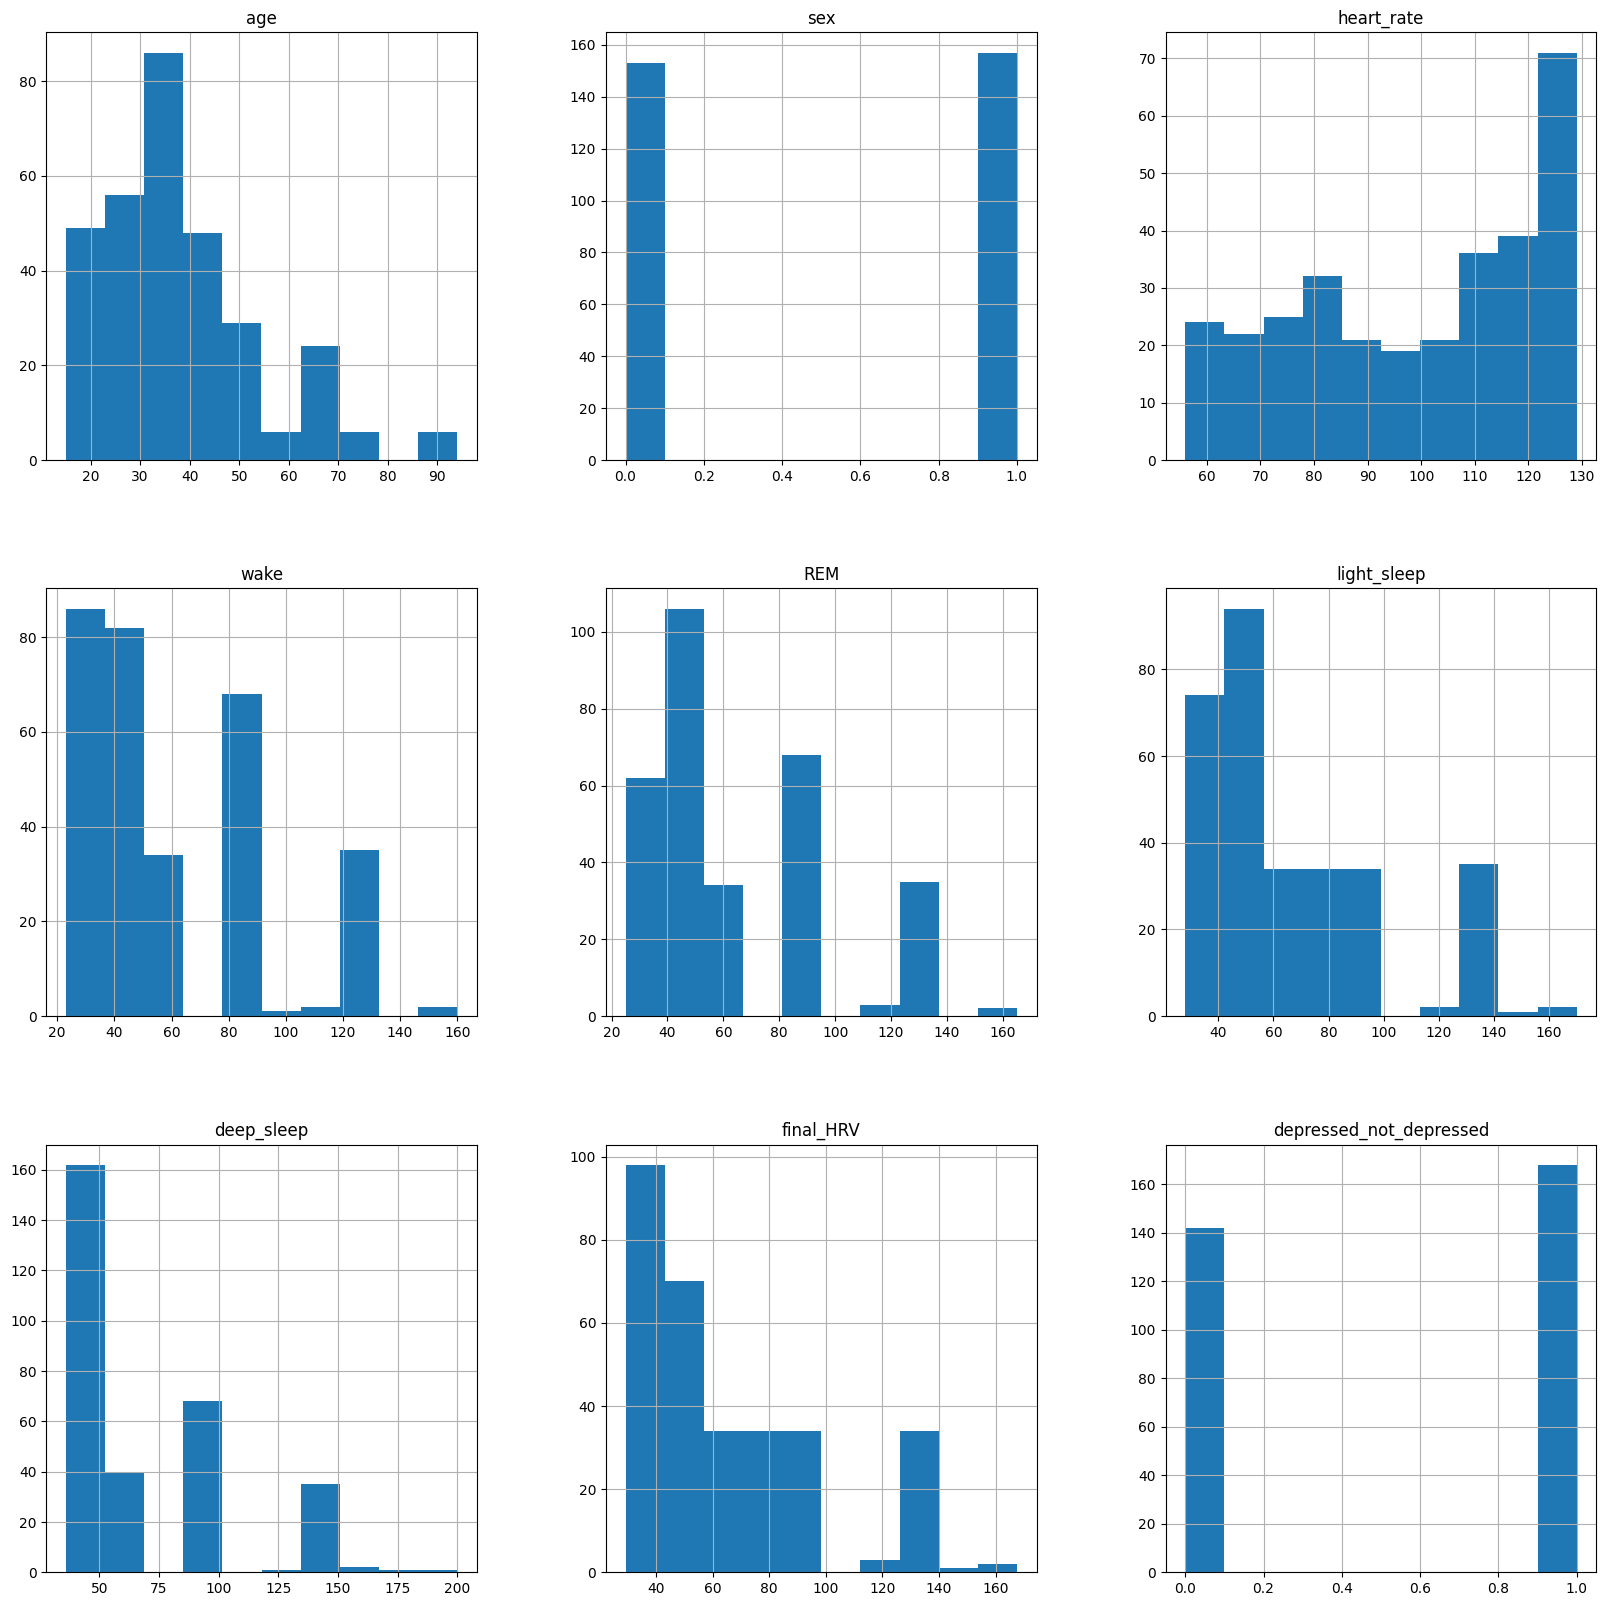

In [ ]:
df.hist(figsize = (20,20))

In [ ]:
#Splitting the dataset
X = df.drop('depressed_not_depressed', axis=1)
y = df['depressed_not_depressed']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
 random_state=7)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [ ]:
rfc_train = rfc.predict(X_train)
from sklearn import metrics
print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [ ]:
from sklearn import metrics
predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 1.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))


[[41  0]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        62

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



In [ ]:
#Building the model using DecisionTree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn import metrics
predictions = dtree.predict(X_test)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 1.0


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[41  0]
 [ 0 62]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        41
           1       1.00      1.00      1.00        62

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



In [ ]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)

SVC()

In [ ]:
svc_pred = svc_model.predict(X_test)
from sklearn import metrics
print("Accuracy Score =", format(metrics.accuracy_score(y_test, svc_pred)))

Accuracy Score = 0.9902912621359223


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, svc_pred))
print(classification_report(y_test,svc_pred))

[[41  0]
 [ 1 61]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        41
           1       1.00      0.98      0.99        62

    accuracy                           0.99       103
   macro avg       0.99      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



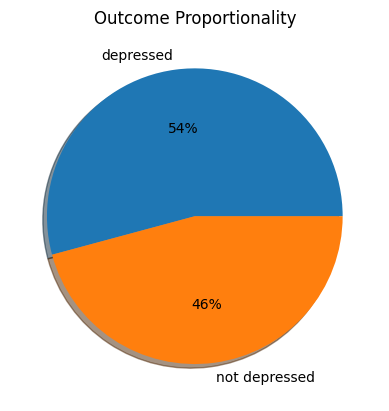

In [ ]:
plt.pie(
    df['depressed_not_depressed'].value_counts(),
    labels=['depressed', 'not depressed'],
    autopct='%.0f%%',  # Correct percentage formatting with %%
    shadow=True
)
plt.title('Outcome Proportionality')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression model
model = LogisticRegression()


Prediction: [0]
This Person does not have a depression


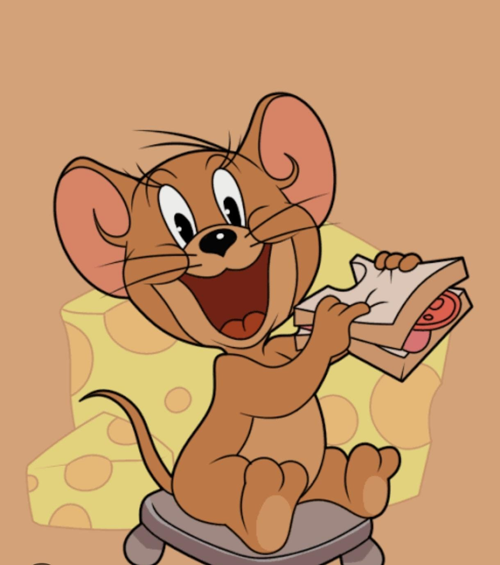

In [ ]:
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from PIL import Image
import glob


# Example training data (replace this with your actual dataset)
X, y = make_classification(n_samples=100, n_features=8, random_state=42)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Input data
input_data = (25,1,70,46,48,52,54,50)

# Convert input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Make a prediction
prediction = model.predict(input_data_reshaped)
print("Prediction:", prediction)

# Output the result
if prediction[0] == 0:
    print('This Person does not have a depression')
    img = Image.open('/content/h2.jpeg')
    width,height=img.size
    n_width=500
    n_height=int(height*n_width/width)
    r_img=img.resize((n_width,n_height))
    display(r_img)

else:
    print('This Person has depression')
    img= Image.open('/content/s1.jpeg')
    width,height=img.size
    n_width=500
    n_height=int(height*n_width/width)
    r_img=img.resize((n_width,n_height))
    display(r_img)
